In [ ]:
!pip install pandas
!pip install numpy
!pip install yfinance

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')
import math
import joblib

df = yf.download('BTC-USD', start='2024-06-01', end='2024-06-11', interval='1d')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-01,67489.609375,67839.765625,67386.195312,67706.937500,67706.937500,11641495604
2024-06-02,67710.273438,68409.164062,67315.523438,67751.601562,67751.601562,17110588415
2024-06-03,67753.898438,70230.820312,67589.835938,68804.781250,68804.781250,32401285324
2024-06-04,68804.570312,71047.406250,68564.640625,70567.765625,70567.765625,33149696545
2024-06-05,70568.351562,71735.414062,70390.710938,71082.820312,71082.820312,32810771409
2024-06-06,71082.843750,71625.734375,70119.125000,70757.164062,70757.164062,25223152007
2024-06-07,70759.187500,71907.851562,68507.257812,69342.585938,69342.585938,36188381096
2024-06-08,69324.179688,69533.320312,69210.742188,69305.773438,69305.773438,14262185861
2024-06-09,69297.492188,69817.523438,69160.843750,69647.992188,69647.992188,13534028500


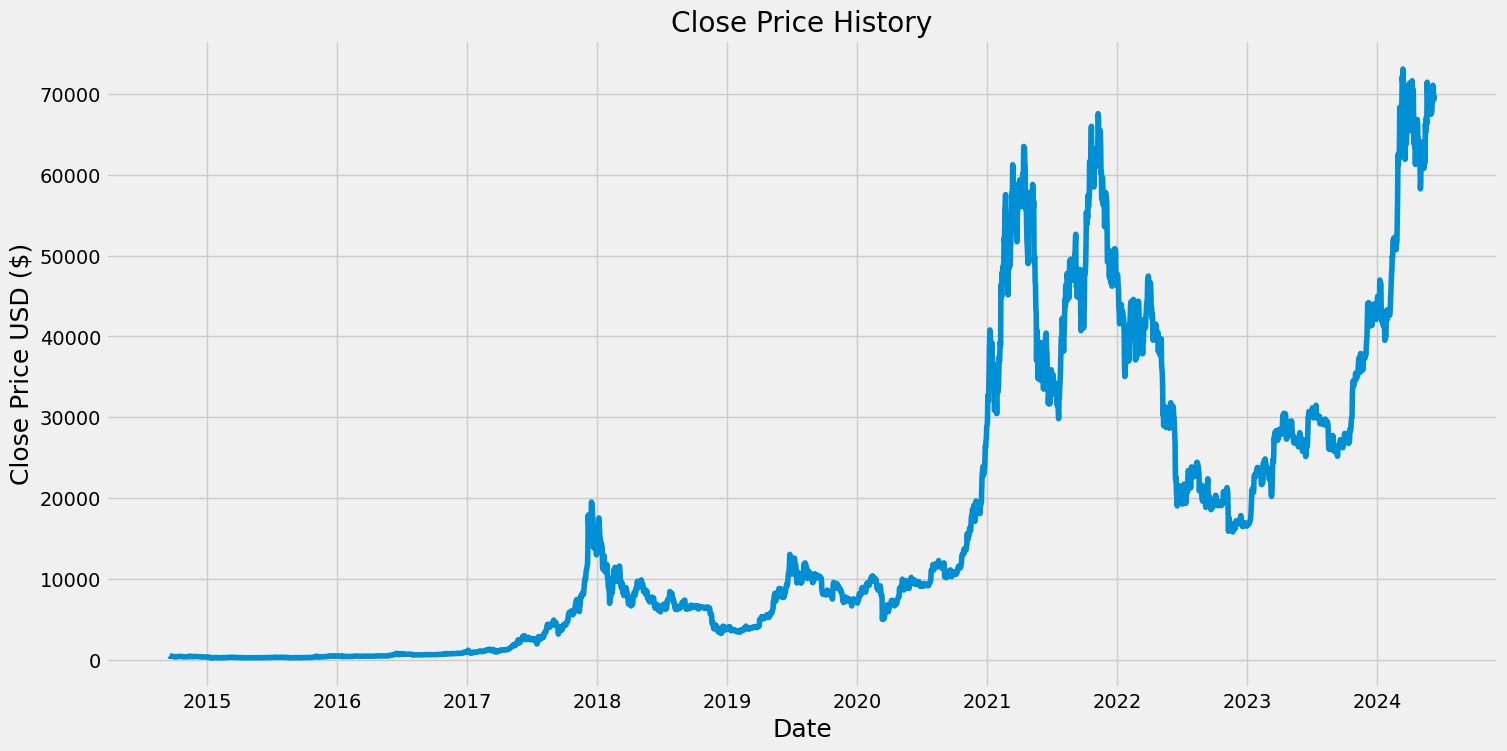

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

2844

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00383005],
       [0.00337886],
       [0.00297225],
       ...,
       [0.94818317],
       [0.95287718],
       [0.95101571]])

In [ ]:
# Ganti 'nama_scaler.pkl' dengan nama file yang Anda inginkan untuk scaler Anda.
joblib.dump(scaler, 'skripsi_scaler2.pkl')

['skripsi_scaler2.pkl']

In [ ]:
from google.colab import files
files.download('skripsi_scaler2.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Training data
train_data = scaled_data[0:training_data_len , :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2784, 60, 1)

In [ ]:
#LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Menampilkan Parameter Model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31901 (124.61 KB)
Trainable params: 31901 (124.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=80)

Epoch 1/80
2784/2784 [==============================] - 119s 40ms/step - loss: 0.0013
Epoch 2/80
2784/2784 [==============================] - 96s 34ms/step - loss: 5.7525e-04
Epoch 3/80
2784/2784 [==============================] - 95s 34ms/step - loss: 4.5009e-04
Epoch 4/80
2784/2784 [==============================] - 98s 35ms/step - loss: 3.6623e-04
Epoch 5/80
2784/2784 [==============================] - 100s 36ms/step - loss: 3.2673e-04
Epoch 6/80
2784/2784 [==============================] - 96s 34ms/step - loss: 3.0638e-04
Epoch 7/80
2784/2784 [==============================] - 96s 35ms/step - loss: 3.0703e-04
Epoch 8/80
2784/2784 [==============================] - 96s 35ms/step - loss: 2.7164e-04
Epoch 9/80
2784/2784 [==============================] - 99s 35ms/step - loss: 2.9702e-04
Epoch 10/80
2784/2784 [==============================] - 94s 34ms/step - loss: 2.5602e-04
Epoch 11/80
2784/2784 [==============================] - 96s 35ms/step - loss: 2.4035e-04
Epoch 12/80
2784/2784

In [ ]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#Prediksi
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

23/23 [==============================] - 2s 18ms/step


In [ ]:
#Root Mean Squared Error
rmse = np.sqrt(np.mean(predictions - y_test)**2 )
rmse

738.342494615858

In [ ]:
model.save('lstm_forecast_real2.h5')

In [ ]:
from google.colab import files
files.download('lstm_forecast_real2.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-18-dbfac1cda5f1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


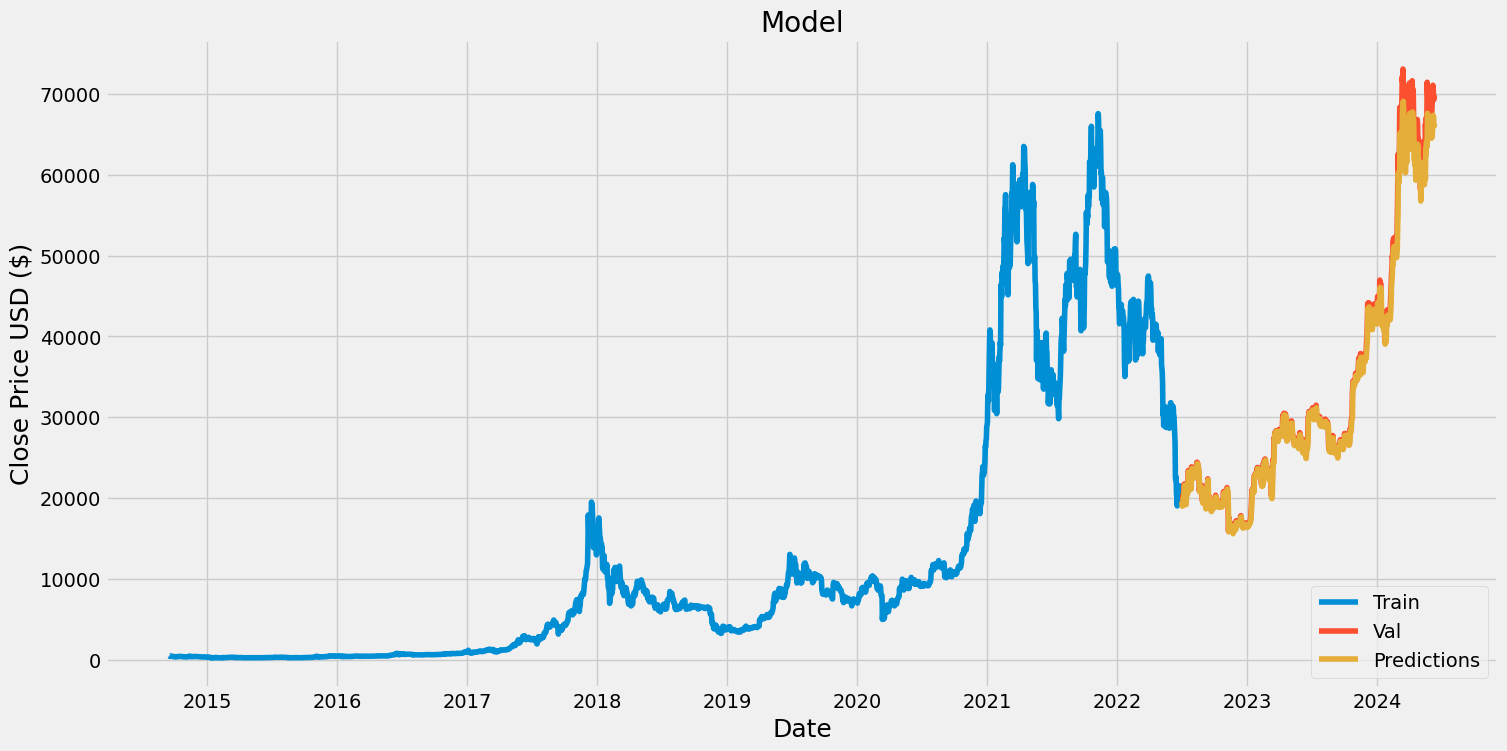

In [ ]:
#Plot
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val','Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

,Close,Predictions
Date,,
2022-07-01,19269.367188,19546.537109
2022-07-02,19242.255859,19032.308594
2022-07-03,19297.076172,18980.566406
2022-07-04,20231.261719,19026.548828
2022-07-05,20190.115234,19946.576172
...,...,...
2024-06-06,70757.164062,67355.156250
2024-06-07,69342.585938,67165.265625
2024-06-08,69305.773438,66105.523438


In [ ]:
bitcoin_quote = yf.download('BTC-USD', start='2017-11-09', end='2024-06-09')
new_df = bitcoin_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test =[]
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%%**********************]  1 of 1 completed

1/1 [==============================] - 0s 48ms/step
[[66049.34]]


In [ ]:
df2 = yf.download('ETH-USD', start='2017-11-09', end='2022-12-31', interval='1d')
df2

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...
2022-12-26,1218.920166,1226.974365,1214.335938,1226.974365,1226.974365,3282098400
2022-12-27,1226.987061,1230.418091,1205.895630,1212.791626,1212.791626,4091530737
2022-12-28,1212.736572,1213.128906,1185.702148,1189.986084,1189.986084,4991669631
